In [1]:
from nilearn import plotting
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mne.io import read_raw_eeglab

from utils import show_slices

# fMRI 

## First view on data

(64, 64, 38, 145)

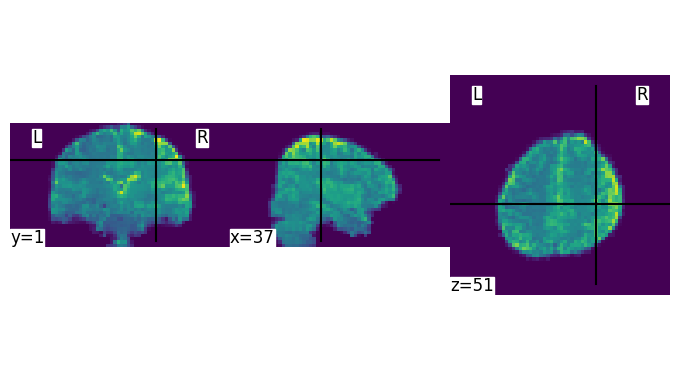

In [2]:
sub_idx = 20
session_idx = 1

# one fMRI example
example_func_brain = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-01_task-monkey1_run-01_bold/func_minimal/example_func_brain.nii.gz'
plotting.plot_img(example_func_brain)

# Full fMRI trial
func_mc = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-monkey1_run-01_bold/func_minimal/func_mc.nii.gz'
nii_img = nib.load(func_mc)

# Get the data as a numpy array
data = nii_img.get_fdata()
data.shape

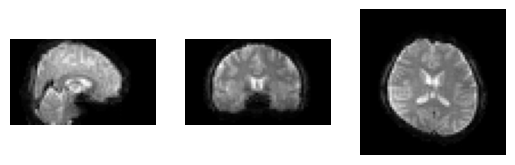

In [11]:
t = 10
slice_0 = data[data.shape[0] // 2, :, :, t]
slice_1 = data[:, data.shape[1] // 2, :, t]
slice_2 = data[:, :, data.shape[2] // 2, t]

show_slices([slice_0, slice_1, slice_2])

In [12]:
print(np.max(data), np.min(data))

2893.18310546875 -0.015011072158813477


## Filtered data

(61, 73, 61, 145)


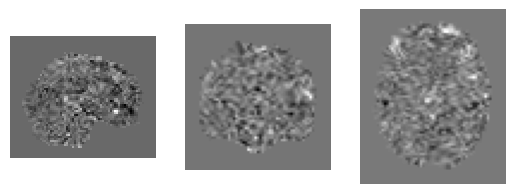

1552.726318359375 -1259.8145751953125


In [18]:
sub_idx = 1
session_idx = 1

data_path = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-monkey1_run-01_bold/func_preproc/func_pp_filter_gsr_sm0.mni152.3mm.nii.gz'
nii_img = nib.load(data_path)

# Get the data as a numpy array
data = nii_img.get_fdata()
print(data.shape)

t = 100
slice_0 = data[data.shape[0] // 2, :, :, t]
slice_1 = data[:, data.shape[1] // 2, :, t]
slice_2 = data[:, :, data.shape[2] // 2, t]

show_slices([slice_0, slice_1, slice_2])

print(np.max(data), np.min(data))

In [11]:
# Фон нулевой
data[0,0,0,0]

np.float64(0.0)

## ROI and Masks

(64, 64, 38)


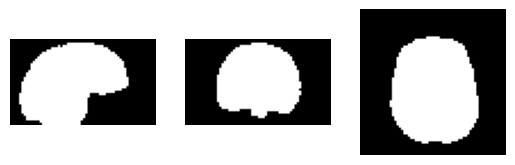

In [28]:
sub_idx = 5
session_idx = 1

mask_path = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-monkey1_run-01_bold/func_seg/global_mask.nii.gz'
nii_mask = nib.load(mask_path)
mask = nii_mask.get_fdata()
print(mask.shape)
slice_0 = mask[mask.shape[0] // 2, :, :]
slice_1 = mask[:, mask.shape[1] // 2, :]
slice_2 = mask[:, :, mask.shape[2] // 2]

show_slices([slice_0, slice_1, slice_2])

(64, 64, 38)


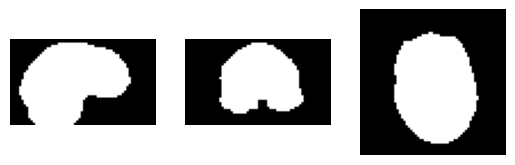

In [9]:
sub_idx = 22
session_idx = 1

mask_path = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-monkey1_run-01_bold/func_reg/func_pp_mask.nii.gz'
nii_mask = nib.load(mask_path)
mask = nii_mask.get_fdata()
print(mask.shape)
slice_0 = mask[mask.shape[0] // 2, :, :]
slice_1 = mask[:, mask.shape[1] // 2, :]
slice_2 = mask[:, :, mask.shape[2] // 2]

show_slices([slice_0, slice_1, slice_2])

# Shapes

In [13]:
# sub_idx = 1
# session_idx = 1

# for sub_idx in range(1, 23):

#     data_path = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/func/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-monkey1_run-01_bold/func_preproc/func_pp_filter_sm0.mni152.3mm.nii.gz'
#     nii_img = nib.load(data_path)
#     data = nii_img.get_fdata()
#     print(data.shape)``

# EEG

In [2]:
sub_idx = 1
session_idx = 1

path = f'natview/data/sub-{sub_idx:02d}/ses-{session_idx:02d}/eeg/sub-{sub_idx:02d}_ses-{session_idx:02d}_task-dme_run-01_eeg.set'

raw_data = read_raw_eeglab(path)
data = np.array(raw_data.get_data())
data.shape

/tmp/ipykernel_101167/833325554.py:6: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_data = read_raw_eeglab(path)
/tmp/ipykernel_101167/833325554.py:6: RuntimeWarning: Limited 3 annotation(s) that were expanding outside the data range.
  raw_data = read_raw_eeglab(path)
/tmp/ipykernel_101167/833325554.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw_data = read_raw_eeglab(path)


(60, 146875)

In [5]:
raw_data

<RawEEGLAB | sub-01_ses-01_task-dme_run-01_eeg.set, 60 x 146875 (587.5 s), ~67.3 MB, data loaded>

<Axes: >

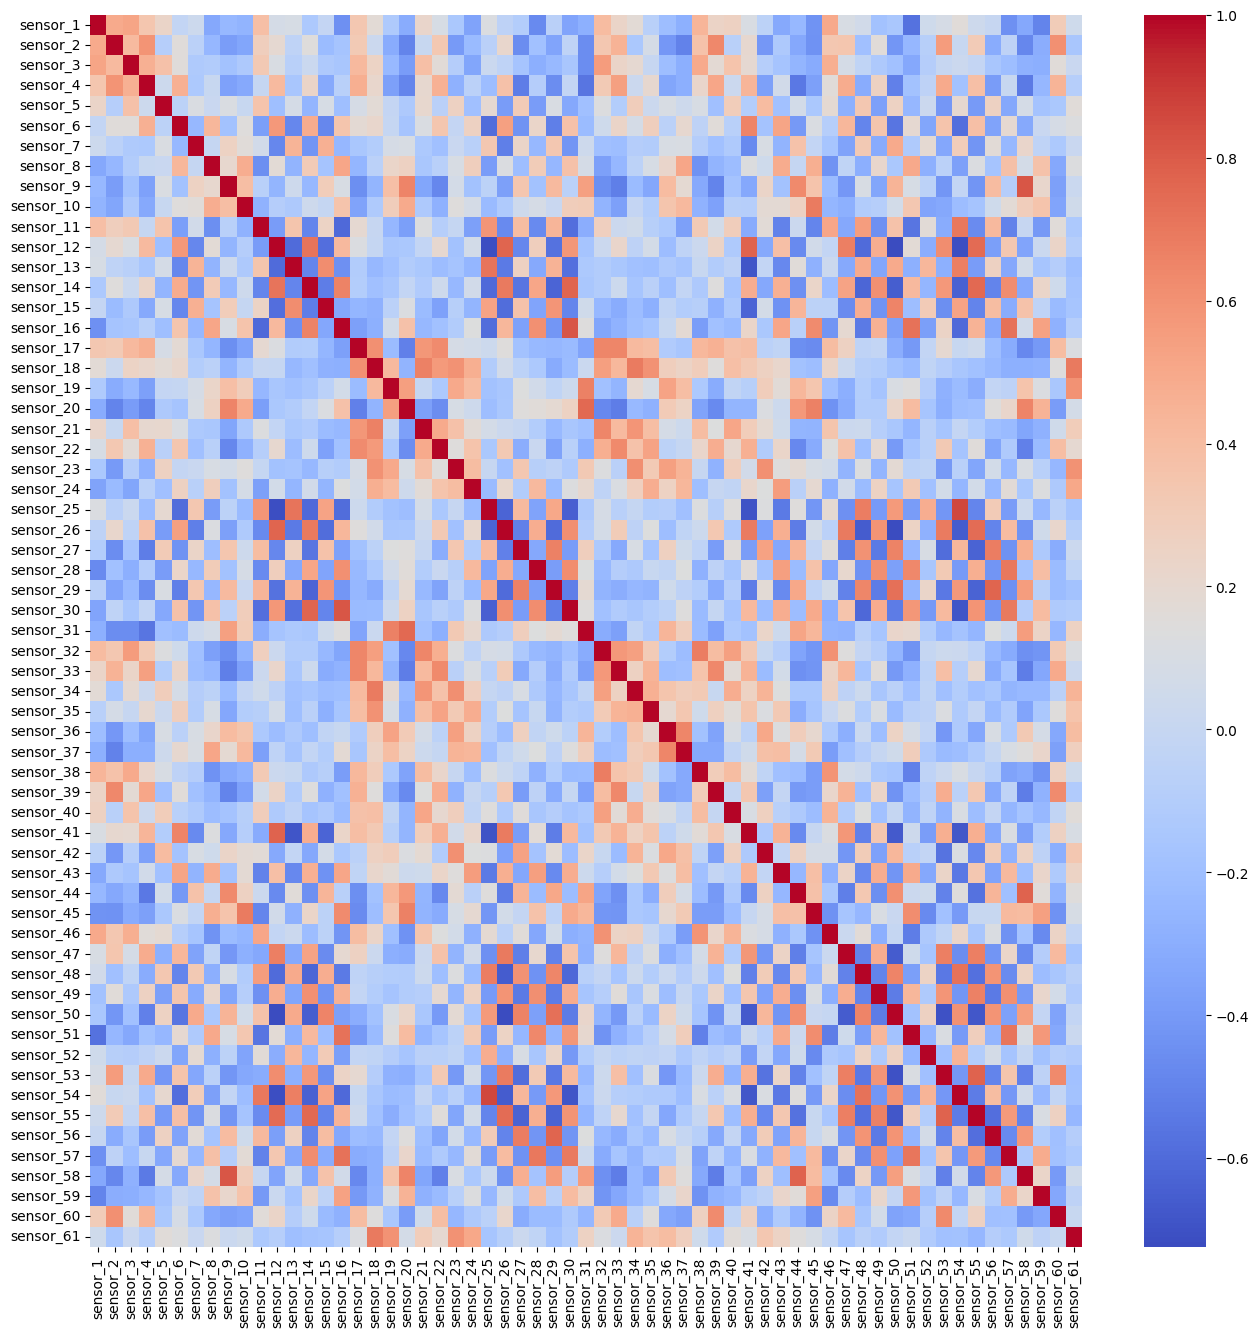

In [56]:
df = pd.DataFrame(data.T, columns=[f'sensor_{i+1}' for i in range(data.T.shape[1])])
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(method='pearson'), cmap='coolwarm')

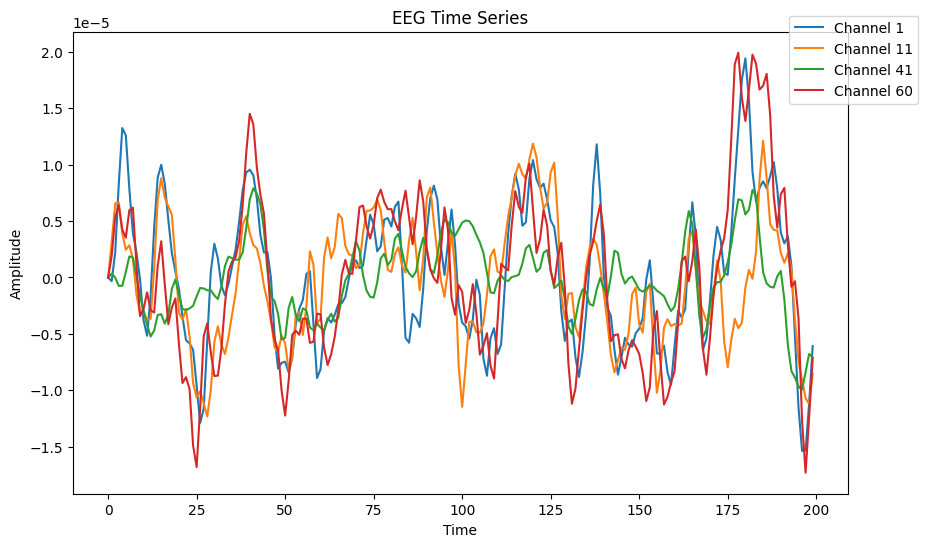

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
# for i in range(data.shape[0]//15):
for i in [0, 10, 40, 59]:
    ax.plot(data[i, :200], label=f'Channel {i+1}')

ax.set_title('EEG Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.show()